In [52]:
import numpy as np
import itertools
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
vals = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['diamonds', 'hearts', 'spades', 'clubs']

deck = pd.DataFrame(itertools.product(vals, suits))

In [4]:
#select 5 cards at random for hand 1
hand1 = deck.sample(5)
print("person 1 is dealt", hand1)
##subtract out hand 1
outer_join = deck.merge(hand1, how = 'outer', indicator = True)
deck_minus_hand1 = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
#hand2
hand2 = deck_minus_hand1.sample(5)
print("person 2 is dealt", hand2)

#remove hand1 and hand2 from deck 
outer_join = deck_minus_hand1.merge(hand2, how = 'outer', indicator = True)
delt_deck = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)

person 1 is dealt     0         1
18  6    spades
45  K    hearts
43  Q     clubs
26  8    spades
8   4  diamonds
person 2 is dealt     0       1
47  K   clubs
7   3   clubs
50  A  spades
39  J   clubs
21  7  hearts


In [5]:
hand2[0]=hand2[0].replace(['7'],('Q'))
hand2[0]=hand2[0].replace(['6'],('Q'))

Rules for drawing cards from the deck: 
If an ace is found without a two of a kind or three pair deal 4 keeping the ace.
deal 3 for a pair throwing 2 cards at random 
deal 2 if 3 of a kind throwing 3 cards at random

In [6]:

#define decision engine as which cards to keep and which to draw
def hand(which_hand):
    #any aces in your hand?
    AnyAces = which_hand[0]=="A"
    AnyAces = len(which_hand[AnyAces])
    
    two_of_a_kind_or_better = which_hand.groupby([0])[0].transform("count").max() > 1

    if AnyAces > 0 and two_of_a_kind_or_better == True:
        keep_cards = which_hand.groupby([0])[0].transform("count") > 1
        keep_cards = which_hand[keep_cards]
        n_draw = 5-len(keep_cards)
    elif AnyAces > 0 and two_of_a_kind_or_better == False:
        n_draw = 4
        keep_ace = which_hand[0] == 'A'
        keep_cards = which_hand[keep_ace]
    elif AnyAces == 0 and two_of_a_kind_or_better == False:
        n_draw = 3
        keep_cards = which_hand.sample(2)
    else: 
        keep_cards = which_hand.groupby([0])[0].transform("count") > 1
        keep_cards = which_hand[keep_cards]
        n_draw = 5-len(keep_cards)
    return n_draw, keep_cards

Cards in both player hands before the draw

In [7]:
n1_draw, keep_cards1 = hand(hand1)
print("person 1: number of draws", n1_draw)
print("person 1: cards kept", keep_cards1)
n2_draw, keep_cards2 = hand(hand2)
print("person 2: number of draws", n2_draw)
print("person 2: cards kept", keep_cards2)

person 1: number of draws 3
person 1: cards kept     0       1
18  6  spades
26  8  spades
person 2: number of draws 4
person 2: cards kept     0       1
50  A  spades


In [8]:
#update hand based on decisions
drawn1 = delt_deck.sample(n1_draw)
##subtract out from first draw
outer_join = delt_deck.merge(drawn1, how = 'outer', indicator = True)
deck_minus_draw1 = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
drawn2 = deck_minus_draw1.sample(n2_draw)

In [9]:
final_hand1 = pd.concat([keep_cards1, drawn1])
final_hand2 = pd.concat([keep_cards2, drawn2])

Final hand to play from player 1 and player 2

In [10]:
print("final hand for player 1:")
print(final_hand1)
print("fianl hand for player 2:")
print(final_hand2)

final hand for player 1:
    0         1
18  6    spades
26  8    spades
3   2     clubs
9   4    spades
22  8  diamonds
fianl hand for player 2:
     0         1
50   A    spades
16   6     clubs
21   8    hearts
30  10     clubs
14   6  diamonds


In [32]:
listTest = []
listTest.append(final_hand1[0])

if a full house is found return true

In [11]:

def full_house(final_hand):
    hand_value = final_hand[0].value_counts()
    hand_value = ((hand_value == 2) | (hand_value == 3))
    full_house = len(hand_value) == 2
    return full_house

In [12]:
fullHouse1 = full_house(final_hand1)
fullHouse2 = full_house(final_hand2)

score event where full house is played by player 1 and player 2

In [13]:
if fullHouse1 == True & fullHouse2 == True:
    total_fullhouse = 1
else: total_fullhouse = 0

In [50]:
#run simulation
n_one_fullhouse = []
p_one_fullhouse = []
n_games_before_one_fullhouse = []
n_two_fullhouses = []
p_two_fullhouses = []
n_games_before_two_fullhouses = []
games = 10000
simulations = 100

for i in range(simulations):
    one_fullhouse = []
    two_fullhouses = []
    number_games_before_one_fullhouse = []
    number_games_before_two_fullhouse = []
    for i in range(games):
        #select 5 cards at random for hand 1
        hand1 = deck.sample(5)
        ##subtract out hand 1
        outer_join = deck.merge(hand1, how = 'outer', indicator = True)
        deck_minus_hand1 = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
        #hand2
        hand2 = deck_minus_hand1.sample(5)

        #remove hand1 and hand2 from deck 
        outer_join = deck_minus_hand1.merge(hand2, how = 'outer', indicator = True)
        delt_deck = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)

        #define decision engine as which cards to keep and which to draw
        #define decision engine as which cards to keep and which to draw
        def hand(which_hand):
            #any aces in your hand?
            AnyAces = which_hand[0]=="A"
            AnyAces = len(which_hand[AnyAces])
            
            two_of_a_kind_or_better = which_hand.groupby([0])[0].transform("count").max() > 1

            if AnyAces > 0 and two_of_a_kind_or_better == True:
                keep_cards = which_hand.groupby([0])[0].transform("count") > 1
                keep_cards = which_hand[keep_cards]
                n_draw = 5-len(keep_cards)
            elif AnyAces > 0 and two_of_a_kind_or_better == False:
                n_draw = 4
                keep_ace = which_hand[0] == 'A'
                keep_cards = which_hand[keep_ace]
            elif AnyAces == 0 and two_of_a_kind_or_better == False:
                n_draw = 3
                keep_cards = which_hand.sample(2)
            else: 
                keep_cards = which_hand.groupby([0])[0].transform("count") > 1
                keep_cards = which_hand[keep_cards]
                n_draw = 5-len(keep_cards)
            return n_draw, keep_cards
            
        n1_draw, keep_cards1 = hand(hand1)
        n2_draw, keep_cards2 = hand(hand2)
        #update hand based on decisions
        drawn1 = delt_deck.sample(n1_draw)
        ##subtract out from first draw
        outer_join = delt_deck.merge(drawn1, how = 'outer', indicator = True)
        deck_minus_draw1 = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
        drawn2 = deck_minus_draw1.sample(n2_draw)
            
        final_hand1 = pd.concat([keep_cards1, drawn1])
        final_hand2 = pd.concat([keep_cards2, drawn2])
        
        def full_house(final_hand):
            hand_value = final_hand[0].value_counts()
            hand_value = ((hand_value == 2) | (hand_value == 3))
            full_house = len(hand_value) == 2
            return full_house
        
        fullHouse1 = full_house(final_hand1)
        fullHouse2 = full_house(final_hand2)
        #event with 2 full houses played
        if fullHouse1 == True & fullHouse2 == True:
            both_fullhouses = 1
        else: both_fullhouses = 0

        #event where 1 full house was played
        if fullHouse1 == True or fullHouse2 == True:
            single_fullhouse = 1
        else: single_fullhouse = 0
        
        one_fullhouse.append(single_fullhouse)
        two_fullhouses.append(both_fullhouses)

        try:
            number_games_before_one_fullhouse.append(one_fullhouse.index(1)+1)
        except ValueError:
            number_games_before_one_fullhouse.append(0)
        try:
            number_games_before_two_fullhouse.append(two_fullhouses.index(1)+1)
        except ValueError:
            number_games_before_two_fullhouse.append(0)

    #one full houses
    total_one_fullhouse = np.sum(one_fullhouse)
    #probabily
    prob_one_fullhouse = (np.sum(one_fullhouse) / games)*100

    #two full houses
    total_two_fullhouse = np.sum(two_fullhouses)
    #probabily
    prob_two_fullhouse = (np.sum(two_fullhouses) / games)*100

    n_one_fullhouse.append(total_one_fullhouse)
    p_one_fullhouse.append(prob_one_fullhouse)
    n_two_fullhouses.append(total_two_fullhouse)
    p_two_fullhouses.append(prob_two_fullhouse)
    n_games_before_one_fullhouse.append(number_games_before_one_fullhouse)
    n_games_before_two_fullhouses.append(number_games_before_two_fullhouse)



average probability of one of the players in two player game plays a fullhouse 2.7918000000000003
(array([ 3.,  6.,  6., 13., 18., 19., 11., 12.,  8.,  4.]), array([2.39 , 2.467, 2.544, 2.621, 2.698, 2.775, 2.852, 2.929, 3.006,
       3.083, 3.16 ]), <BarContainer object of 10 artists>)


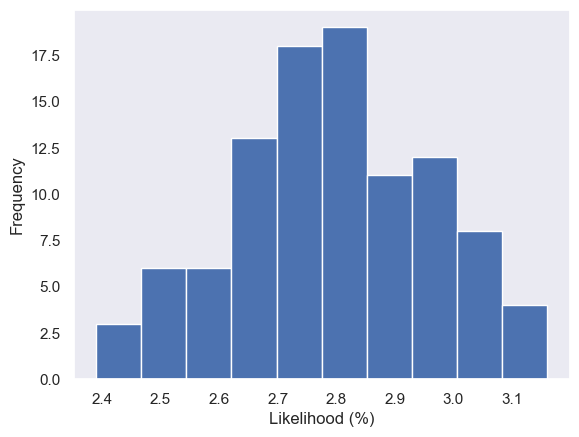

In [84]:
print("average probability of one of the players in two player game plays a fullhouse", np.mean(p_one_fullhouse))
p_one_fullhouse_plot = plt.hist(p_one_fullhouse)
plt.xlabel('Likelihood (%)')
plt.ylabel('Frequency')
plt.grid(False)
print(p_one_fullhouse_plot)





average number of times one of the players plays a fullhouse during 10,000 games is 279.18
(array([ 3.,  6.,  6., 13., 18., 19., 11., 12.,  8.,  4.]), array([239. , 246.7, 254.4, 262.1, 269.8, 277.5, 285.2, 292.9, 300.6,
       308.3, 316. ]), <BarContainer object of 10 artists>)


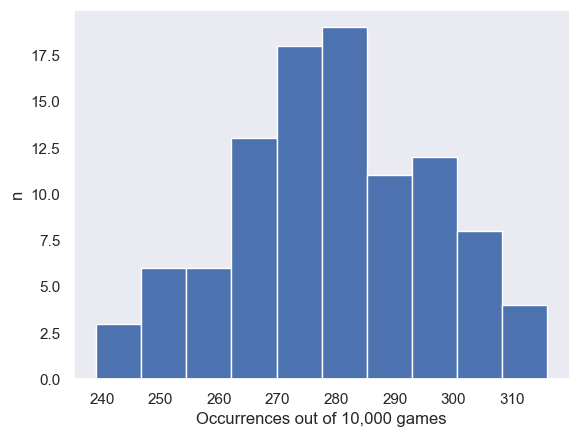

In [83]:
print("average number of times one of the players plays a fullhouse during 10,000 games is", np.mean(n_one_fullhouse))
one_fullhouse_plot = plt.hist(n_one_fullhouse)
plt.xlabel('Occurrences out of 10,000 games')
plt.ylabel('n')
plt.grid(False)
print(one_fullhouse_plot)

probability of both players in a two player game both play a fullhouse 0.021 %
(array([10.,  0., 25.,  0., 31.,  0., 19.,  0.,  6.,  9.]), array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 ]), <BarContainer object of 10 artists>)


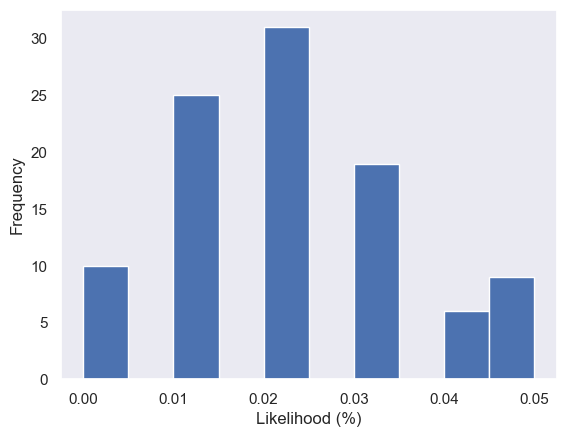

In [79]:
print("probability of both players in a two player game both play a fullhouse", np.mean(p_two_fullhouses).round(3), "%")
p_two_fullhouse_plot = plt.hist(p_two_fullhouses)
plt.xlabel('Likelihood (%)')
plt.ylabel('Frequency')
plt.grid(False)
print(p_two_fullhouse_plot)



average number of times both players play fullhouses during 10,000 games is 2.13
(array([10.,  0., 25.,  0., 31.,  0., 19.,  0.,  6.,  9.]), array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]), <BarContainer object of 10 artists>)


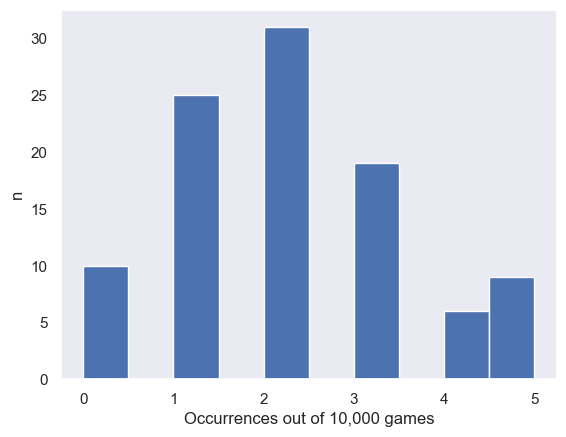

In [80]:
print("average number of times both players play fullhouses during 10,000 games is", np.mean(n_two_fullhouses))
two_fullhouse_plot = plt.hist(n_two_fullhouses)
plt.xlabel('Occurrences out of 10,000 games')
plt.ylabel('n')
plt.grid(False)
print(two_fullhouse_plot)
